In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# This part calls for the tex package with Palantino font family (Note latex should be installed in the system to run this)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})
from math import *

In [156]:
Prob_turk = pd.read_csv("Turkish.csv")
Prob_bigram_turk = pd.read_csv("Bigram_Turkish.csv")

Prob_eng = pd.read_csv("English.csv")
Prob_bigram_eng = pd.read_csv("Bigram_English.csv")

In [157]:
alph = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [158]:
Pr_eng_array = Prob_eng.iloc[:,1].to_numpy()
Total_prob_eng = np.sum(Prob_eng.iloc[:,1].to_numpy())
Total_prob_eng

1.0122

In [159]:
np.average(Prob_eng.iloc[:,1].to_numpy())

0.03893076923076923

In [160]:
Pr_turk_array = Prob_turk.iloc[:,1].to_numpy()
Total_prob_turk = np.sum(Prob_turk.iloc[:,1].to_numpy())
Total_prob_turk

0.9997999999999999

In [161]:
np.average(Prob_turk.iloc[:,1].to_numpy())

0.03845384615384615

In [162]:
#uniform distribution would be 1/26 with all equal probability for each letter
1/26

0.038461538461538464

In [163]:
Pr_eng_bigram_array = Prob_bigram_eng.iloc[:,2].to_numpy()
Pr_turk_bigram_array = Prob_bigram_turk.iloc[:,1].to_numpy()

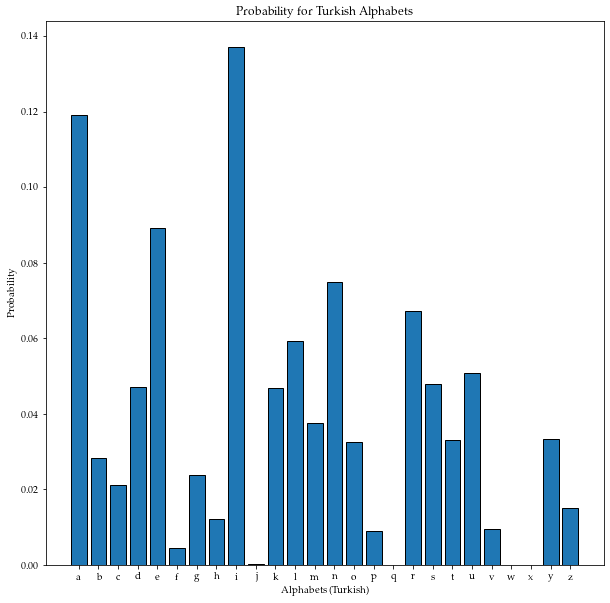

In [164]:
f1 = plt.figure(figsize=(10,10))
plt.xlabel("Alphabets (Turkish)")
plt.ylabel("Probability")
plt.title("Probability for Turkish Alphabets")
plt.bar(alph,Pr_turk_array, edgecolor="black", align="center")
f1.savefig('pr_turk_alph.pdf',bbox_inches='tight')

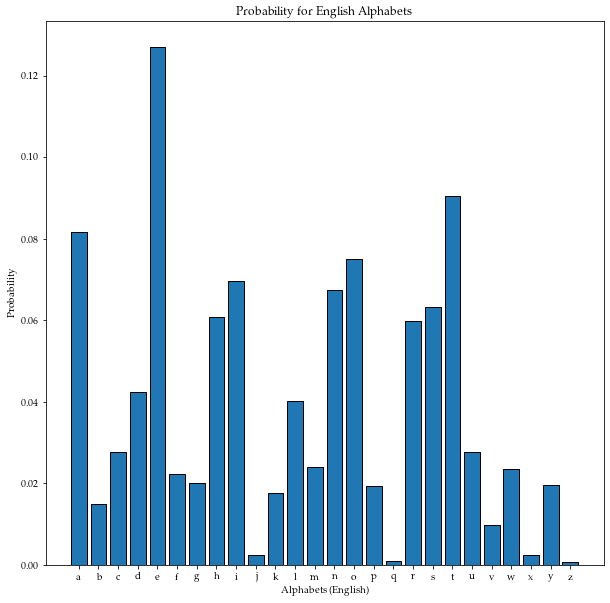

In [165]:
f2 = plt.figure(figsize=(10,10))
plt.xlabel("Alphabets (English)")
plt.ylabel("Probability")
plt.title("Probability for English Alphabets")
plt.bar(alph,Pr_eng_array, edgecolor="black", align="center")
f2.savefig('pr_eng_alph.pdf',bbox_inches='tight')

In [166]:
information_entropy_turk = -Prob_turk.iloc[:,1].to_numpy()*np.emath.logn(2, Prob_turk.iloc[:,1])
information_entropy_turk = np.nan_to_num(information_entropy_turk,nan=0)
total_entropy_turk = np.sum(information_entropy_turk)
total_entropy_turk

C:\Users\sambi\AppData\Local\Temp/ipykernel_32200/3718246972.py:1: RuntimeWarning: invalid value encountered in multiply
  information_entropy_turk = -Prob_turk.iloc[:,1].to_numpy()*np.emath.logn(2, Prob_turk.iloc[:,1])


4.0850035617111535

In [167]:
information_entropy_eng = -Prob_eng.iloc[:,1].to_numpy()*np.emath.logn(2, Prob_eng.iloc[:,1])
information_entropy_eng = np.nan_to_num(information_entropy_eng,nan=0)
total_entropy_eng = np.sum(information_entropy_eng)
total_entropy_eng

4.24026565382759

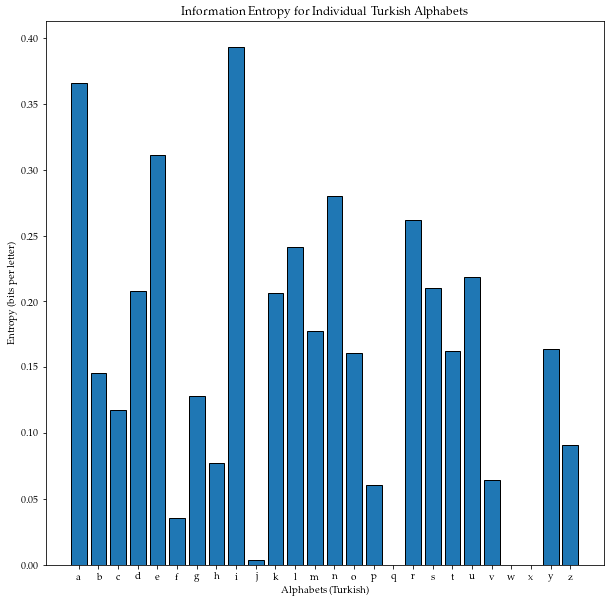

In [168]:
f3 = plt.figure(figsize=(10,10))
plt.xlabel("Alphabets (Turkish)")
plt.ylabel("Entropy (bits per letter)")
plt.title("Information Entropy for Individual Turkish Alphabets")
plt.bar(alph,information_entropy_turk, edgecolor="black", align="center")
f3.savefig('ent_turk_alph.pdf',bbox_inches='tight')

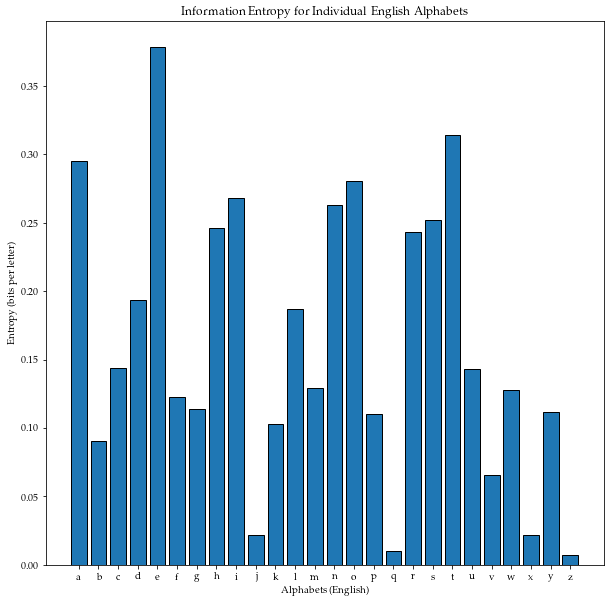

In [169]:
f4 = plt.figure(figsize=(10,10))
plt.xlabel("Alphabets (English)")
plt.ylabel("Entropy (bits per letter)")
plt.title("Information Entropy for Individual English Alphabets")
plt.bar(alph,information_entropy_eng, edgecolor="black", align="center")
f4.savefig('ent_eng_alph.pdf',bbox_inches='tight')

The probability of getting letter $a$ as the initiating letter from the bigrams is,
\begin{equation}
P_B(a) = \sum_x P(ax)
\end{equation}
The probability of letter $b$ given $a$ as a previous letter is,
\begin{equation}
P(b|a) = \frac{P(ab)}{P_B(a)}
\end{equation}
Then the conditional entropy of the missing letter given the bigram information is,
\begin{equation}
F_2 = -\sum_{ij}P(ij)\log_{2}[P(j|i)] = -\sum_{ij}P(ij)\log_{2}[P(ij)] + \sum_{i}P_B(i)\log_2[P_B(i)]
\end{equation}

$P_B(a) = \sum_x P(ax)$

In [170]:
Sum_pr_bigram_turk = [0]*len(alph)
for i in range(len(alph)):
    for j in range(np.shape(Prob_bigram_turk)[0]):
        if (Prob_bigram_turk.iloc[j,0][0] == alph[i]):
            Sum_pr_bigram_turk[i] += Pr_turk_bigram_array[j]    
            
Sum_pr_bigram_turk = np.array(Sum_pr_bigram_turk)
Sum_pr_bigram_turk

array([0.065 , 0.0179, 0.    , 0.0392, 0.0399, 0.    , 0.    , 0.    ,
       0.0452, 0.    , 0.0157, 0.0372, 0.0153, 0.0277, 0.0064, 0.    ,
       0.    , 0.0289, 0.    , 0.0059, 0.    , 0.    , 0.    , 0.    ,
       0.0153, 0.    ])

$F_2 = -\sum_{i}P_B(i)\log_2[P_B(i)]$

$F_2 = -\sum_{ij}P(ij)\log_{2}[P(ij)] + \sum_{i}P_B(i)\log_2[P_B(i)]$

In [171]:
F1_turk = -Sum_pr_bigram_turk*np.emath.logn(2, Sum_pr_bigram_turk)
F1_turk = np.nan_to_num(F1_turk,nan=0)
total_F1_turk = np.sum(F1_turk)

bigram_entropy_turk = -Pr_turk_bigram_array*np.emath.logn(2, Pr_turk_bigram_array)
bigram_entropy_turk = np.nan_to_num(bigram_entropy_turk,nan=0)
total_bigram_entropy_turk = np.sum(bigram_entropy_turk)

total_F2_turk = total_bigram_entropy_turk - total_F1_turk
total_F2_turk

C:\Users\sambi\AppData\Local\Temp/ipykernel_32200/125360207.py:1: RuntimeWarning: invalid value encountered in multiply
  F1_turk = -Sum_pr_bigram_turk*np.emath.logn(2, Sum_pr_bigram_turk)


0.6239341475294526

In [172]:
F1_eng = -Sum_pr_bigram_eng*np.emath.logn(2, Sum_pr_bigram_eng)
F1_eng = np.nan_to_num(F1_eng,nan=0)
total_F1_eng = np.sum(F1_eng)

bigram_entropy_eng = -Pr_eng_bigram_array*np.emath.logn(2, Pr_eng_bigram_array)
bigram_entropy_eng = np.nan_to_num(bigram_entropy_eng,nan=0)
total_bigram_entropy_eng = np.sum(bigram_entropy_eng)

total_F2_eng = total_bigram_entropy_eng - total_F1_eng
total_F2_eng

C:\Users\sambi\AppData\Local\Temp/ipykernel_32200/1928640961.py:1: RuntimeWarning: invalid value encountered in multiply
  F1_eng = -Sum_pr_bigram_eng*np.emath.logn(2, Sum_pr_bigram_eng)


0.9075410924467664